In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-08-29 07:41:40.888126: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_mean_9x9_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10245  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10246  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10247  0.078067 -0.018678  257.009999  2491.665562   994.575354   995.806006   
10248  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10249  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.289246   
1      4.113529  4.223896  63.821798  62.581992  ...           112.289246   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.650604   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.650604   
4      4.405489  4.587935  60.655199  58.351445  ...            55.843769   
...         ...       ...        ...        ...  ...                  ...   
10245  4.236066  4.264247  89.521652  89.357990  ...           105.162582   
10246  4.237512  4.264786  90.106352  89.978233  ...           105.162582   
10247  3.944905  3.985403  85.225852  84.833879  ...           101.436668   
10248  3.745458  3.792684  82.634552  82.112733  ...          -145.403687   
10249  3.823687  3.867705  84.046602  83.596072  ...          -146.333954   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.465744           22.776501            61.458996   
1               67.465744           22.776501            61.458996   
2              -98.682716          -52.717159            57.458881   
3              -98.682716          -52.717159            57.458881   
4              101.319244          146.675278            39.602829   
...                   ...                 ...                  ...   
10245           60.482838           15.733209            52.075550   
10246           60.482838           15.733209            52.075550   
10247           56.786667           12.043334            63.349995   
10248          -99.585876          -53.748260            51.517174   
10249         -100.520203          -54.639790            50.991665   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.315250           61.319874    20180403T030600Z   
1               50.315250           61.319874    20180403T030600Z   
2               46.004200           57.347034    20180404T042700Z   
3               46.004200           57.347034    20180404T042700Z   
4               29.839434           39.574715    20180404T175400Z   
...                   ...                 ...                 ...   
10245           41.266422           52.027283    20200121T200600Z   
10246           41.266422           52.027283    20200121T200600Z   
10247           52.369999           63.480000    20200121T203900Z   
10248           40.653912           51.421738    20200121T214800Z   
10249           40.033749           50.635208    20200121T221800Z   

             stop_sensing_time       u10       v10  
0      20180403T044758.125000Z -4.214585  3.935597  
1      20180403T044758.125000Z -3.485326  3.685807  
2      20180404T060858.125000Z  0.053796  2.618398  
3      20180404T060858.125000Z  1.969399  1.141287  
4      20180404T193258.125000Z  4.476319  0.497334  
...                        ...       ...       ...  
10245  20200121T214758.125000Z  7.869203 -2.273894  
10246  20200121T214758.125000Z  7

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10245  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10246  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10247  0.078067 -0.018678  257.009999  2491.665562   994.575354   995.806006   
10248  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10249  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.289246   
1      4.113529  4.223896  63.821798  62.581992  ...           112.289246   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.650604   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.650604   
4      4.405489  4.587935  60.655199  58.351445  ...            55.843769   
...         ...       ...        ...        ...  ...                  ...   
10245  4.236066  4.264247  89.521652  89.357990  ...           105.162582   
10246  4.237512  4.264786  90.106352  89.978233  ...           105.162582   
10247  3.944905  3.985403  85.225852  84.833879  ...           101.436668   
10248  3.745458  3.792684  82.634552  82.112733  ...          -145.403687   
10249  3.823687  3.867705  84.046602  83.596072  ...          -146.333954   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.465744           22.776501            61.458996   
1               67.465744           22.776501            61.458996   
2              -98.682716          -52.717159            57.458881   
3              -98.682716          -52.717159            57.458881   
4              101.319244          146.675278            39.602829   
...                   ...                 ...                  ...   
10245           60.482838           15.733209            52.075550   
10246           60.482838           15.733209            52.075550   
10247           56.786667           12.043334            63.349995   
10248          -99.585876          -53.748260            51.517174   
10249         -100.520203          -54.639790            50.991665   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.315250           61.319874    20180403T030600Z   
1               50.315250           61.319874    20180403T030600Z   
2               46.004200           57.347034    20180404T042700Z   
3               46.004200           57.347034    20180404T042700Z   
4               29.839434           39.574715    20180404T175400Z   
...                   ...                 ...                 ...   
10245           41.266422           52.027283    20200121T200600Z   
10246           41.266422           52.027283    20200121T200600Z   
10247           52.369999           63.480000    20200121T203900Z   
10248           40.653912           51.421738    20200121T214800Z   
10249           40.033749           50.635208    20200121T221800Z   

             stop_sensing_time       u10       v10  
0      20180403T044758.125000Z -4.214585  3.935597  
1      20180403T044758.125000Z -3.485326  3.685807  
2      20180404T060858.125000Z  0.053796  2.618398  
3      20180404T060858.125000Z  1.969399  1.141287  
4      20180404T193258.125000Z  4.476319  0.497334  
...                        ...       ...       ...  
10245  20200121T214758.125000Z  7.869203 -2.273894  
10246  20200121T214758.125000Z  7

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
1021   0.001782  0.000093  371.484998  2458.009279  1011.868144  1013.037003   
4851  -0.004698 -0.169505  317.519997  2484.758815   982.516613   983.720502   
5484   0.028178  0.154875  338.945000  2484.213918   994.130397   995.337000   
24    -0.228433  0.119486  318.164999  2475.939764  1007.714327  1008.913007   
3060   0.009946 -0.040725  295.180002  2483.059580   999.689102  1000.907007   
...         ...       ...         ...          ...          ...          ...   
7832  -0.012150 -0.032903  309.005003  2491.348472  1016.378967  1017.639005   
9509   0.036036  0.065029  341.764999  2475.687606  1013.410787  1014.624500   
2283  -0.175301  0.137656  245.100003  2483.387743  1013.904479  1015.144501   
10196  0.078067 -0.018678  273.285002  2491.742937   981.225596   982.465002   
8799  -0.012150 -0.032903  332.805002  2485.452913  1012.111772  1013.345483   

             Q10       Qair         RH       RH10  ...  azi_angle_trip_fore  \
1021   13.392523  13.305839  90.438449  89.768469  ...            92.415138   
4851    4.525927   4.588808  81.422426  80.839073  ...            71.530121   
5484    4.757585   4.815661  72.185392  71.287183  ...            72.565804   
24      7.096543   7.200788  77.793648  74.634261  ...           112.723450   
3060    5.332663   5.370225  86.726301  86.459978  ...           106.050491   
...          ...        ...        ...        ...  ...                  ...   
7832    3.101611   3.172299  71.287553  70.192200  ...            49.384167   
9509    7.690307   7.690767  93.297103  93.243938  ...            51.683575   
2283    3.383261   3.524088  62.881447  60.933615  ...          -109.632164   
10196   1.646033   1.751579  54.159102  52.832448  ...           -16.742468   
8799    4.523397   4.605750  75.441304  74.145614  ...            56.709381   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
1021            55.282001           18.264572            49.989998   
4851           116.061966          160.512833            53.717781   
5484           117.105911          161.553833            56.818516   
24              67.903084           23.082592            59.065804   
3060            61.341732           16.738888            47.432465   
...                   ...                 ...                  ...   
7832            95.787636          142.084305            62.796524   
9509            97.914322          143.999130            58.209629   
2283           -76.217293          -42.777027            50.519459   
10196          -61.389755         -106.199379            49.537529   
8799           102.144691          147.537399            40.770618   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
1021            39.474567           49.863998    20161017T234800Z   
4851            42.736790           53.537037    20160612T131800Z   
5484            45.754692           56.638515    20161208T131200Z   
24              47.921852           58.989754    20180410T030000Z   
3060            36.965061           47.319500    20161006T205100Z   
...                   ...                 ...                 ...   
7832            51.348057           62.834858    20210120T105400Z   
9509            46.744812           58.234936    20190812T121200Z   
2283            39.825134           50.437840    20180120T003300Z   
10196           38.826420           49.630123    20200112T131200Z   
8799            30.876543           40.782341    20210618T110900Z   

             stop_sensing_time        u10       v10  
1021   20161018T012958.125000Z   1.562817 -0.072222  
4851   20160612T145658.125000Z  11.275191  2.750463  
5484   20161208T145358.125000Z   8.460678  5.404501  
24     20180410T044458.125000Z   2.763711  1.752537  
3060   20161006T223258.125000Z  -3.539782 -2.826794  
...                        ...        ...       ...  
7832   20210120T123258.125000Z -12.100681 -1.246334  
9

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

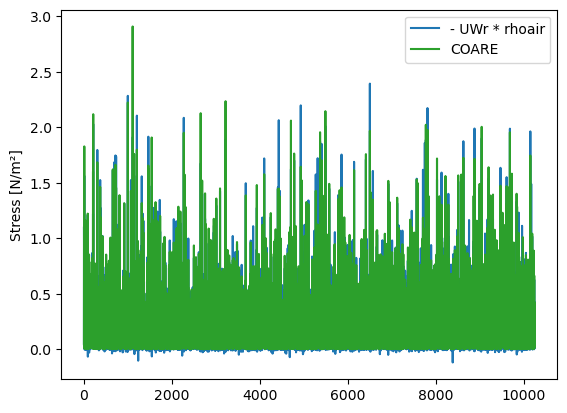

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

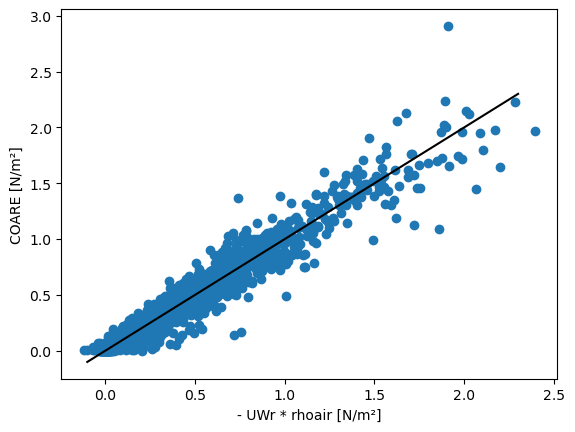

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(10250, 67)

In [13]:
df.shape[0]*0.8

8200.0

In [14]:
split_idx = int(df.shape[0]*0.8)
split_idx

8200

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

sigma0_trip_fore  sigma0_trip_mid  sigma0_trip_aft  \
1021         -17.772102       -13.881780       -16.929161   
4851         -15.445887       -11.851264       -17.357821   
5484         -13.477545        -9.670321       -14.218888   
24           -21.831318       -19.548510       -20.906155   
3060         -21.850832       -16.755947       -22.484287   
...                 ...              ...              ...   
7832         -15.815938       -15.184520       -20.794498   
9509         -20.691900       -16.666641       -22.499487   
2283         -17.132473       -13.162580       -15.829283   
10196        -20.908541       -15.775996       -19.508724   
8799         -22.145815       -15.661598       -23.597837   

       azi_angle_trip_fore  azi_angle_trip_mid  azi_angle_trip_aft  \
1021             92.415138           55.282001           18.264572   
4851             71.530121          116.061966          160.512833   
5484             72.565804          117.105911          161.553833   
24              112.723450           67.903084           23.082592   
3060            106.050491           61.341732           16.738888   
...                    ...                 ...                 ...   
7832             49.384167           95.787636          142.084305   
9509             51.683575           97.914322          143.999130   
2283           -109.632164          -76.217293          -42.777027   
10196           -16.742468          -61.389755         -106.199379   
8799             56.709381          102.144691          147.537399   

       inc_angle_trip_fore  inc_angle_trip_mid  inc_angle_trip_aft        u10  \
1021             49.989998           39.474567           49.863998   1.562817   
4851             53.717781           42.736790           53.537037  11.275191   
5484             56.818516           45.754692           56.638515   8.460678   
24               59.065804           47.921852           58.989754   2.763711   
3060             47.432465           36.965061           47.319500  -3.539782   
...                    ...                 ...                 ...        ...   
7832             62.796524           51.348057           62.834858 -12.100681   
9509             58.209629           46.744812           58.234936   2.488566   
2283             50.519459           39.825134           50.437840   0.494966   
10196            49.537529           38.826420           49.630123  13.741938   
8799             40.770618           30.876543           40.782341   6.454407   

            v10  
1021  -0.072222  
4851   2.750463  
5484   5.404501  
24     1.752537  
3060  -2.826794  
...         ...  
7832  -1.246334  
9509  -4.904989  
2283   1.721997  
10196  6.636851  
8799   1.000170  

[10250 rows x 11 columns]

In [17]:
y = - df['UWr'] * df['rhoair']
y

1021     0.045617
4851     1.104092
5484     0.946978
24       0.012714
3060     0.074756
           ...   
7832     0.424531
9509     0.122020
2283     0.181099
10196    0.045922
8799     0.014547
Length: 10250, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

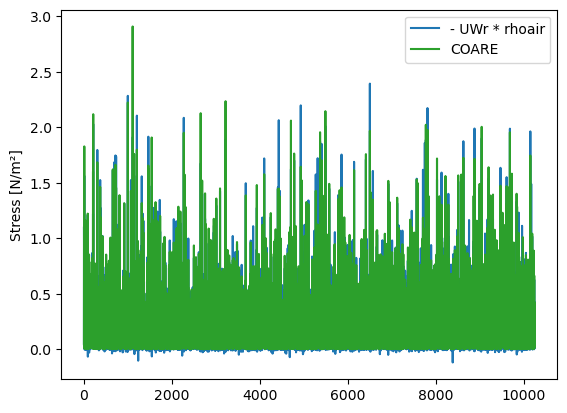

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [24]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [25]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [26]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-08-29 07:41:43.944095: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-29 07:41:43.944352: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-29 07:41:43.944360: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-29 07:41:43.944378: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-hw8rl83-bn-compute): /proc/driver/nvidia/version does not exist
2023-08-29 07:41:43.944527: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

180/180 [==============================] - 1s 2ms/step - loss: 4.7168 - mean_absolute_error: 1.6154 - val_loss: 2.7734 - val_mean_absolute_error: 1.2019
Epoch 2/500
180/180 [==============================] - 0s 689us/step - loss: 2.5174 - mean_absolute_error: 1.1293 - val_loss: 1.5809 - val_mean_absolute_error: 0.8529
Epoch 3/500
180/180 [==============================] - 0s 620us/step - loss: 1.3654 - mean_absolute_error: 0.8074 - val_loss: 1.0972 - val_mean_absolute_error: 0.6628
Epoch 4/500
180/180 [==============================] - 0s 617us/step - loss: 1.0496 - mean_absolute_error: 0.6511 - val_loss: 0.9307 - val_mean_absolute_error: 0.5864
Epoch 5/500
180/180 [==============================] - 0s 624us/step - loss: 0.9517 - mean_absolute_error: 0.5842 - val_loss: 0.8703 - val_mean_absolute_error: 0.5649
Epoch 6/500
180/180 [==============================] - 0s 628us/step - loss: 0.8515 - mean_absolute_error: 0.5692 - val_loss: 0.8459 - val_mean_absolute_error: 0.5585
Epoch 7/500


In [27]:
y_test_norm

4360    -0.597269
8982    -0.262747
7826    -0.279387
6613     0.270993
6400    -0.682873
           ...   
7832     1.068697
9509    -0.210296
2283     0.039486
10196   -0.532031
8799    -0.664681
Length: 2050, dtype: float64

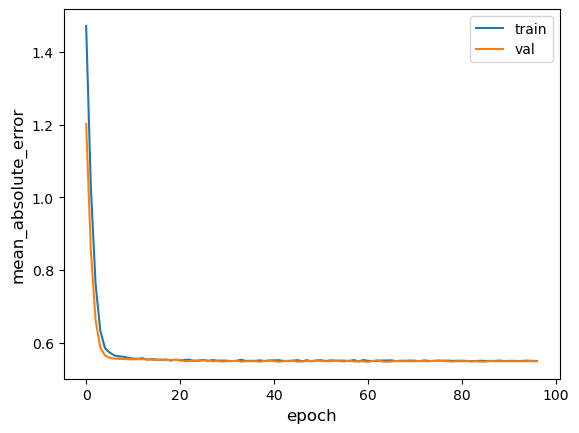

65/65 [==============================] - 0s 349us/step - loss: 0.8264 - mean_absolute_error: 0.5563
Test accuracy 0.556331992149353
Test loss 0.8263549208641052


In [28]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [29]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [30]:
np.mean(y_test)

0.17854516468573506

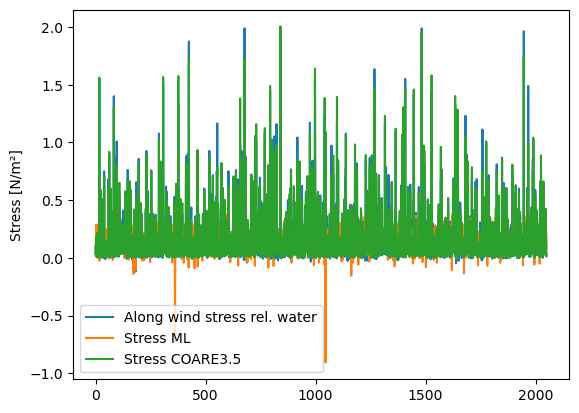

In [31]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

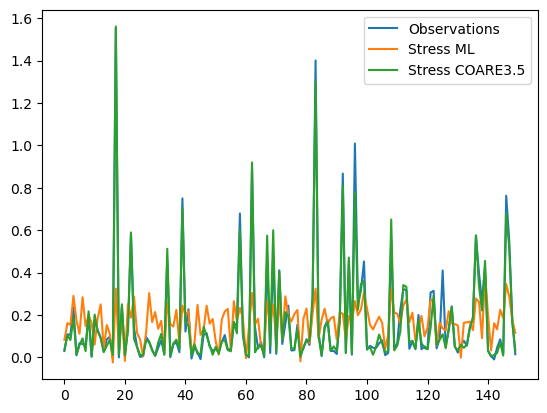

In [32]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

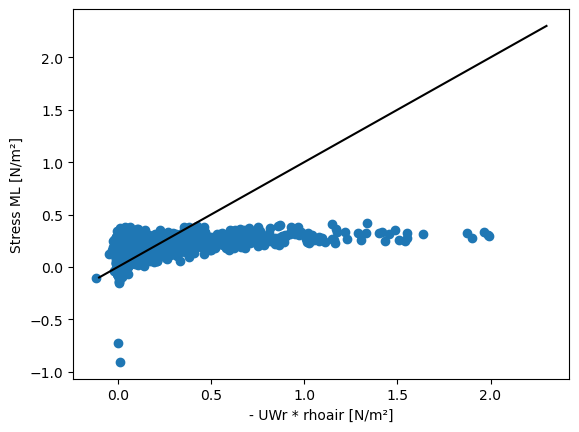

In [33]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

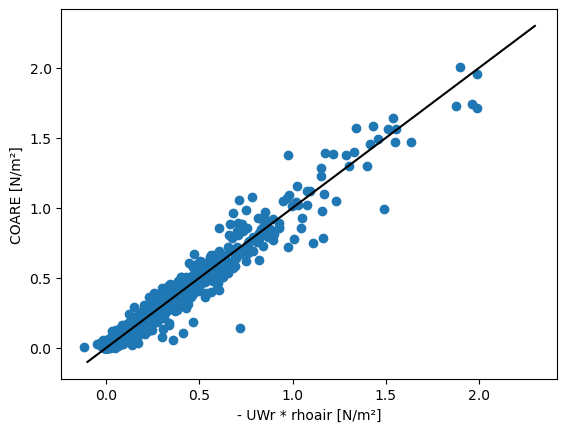

In [34]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [35]:
rmse(y_test.values, y_test_pred)

0.261056091048369

In [36]:
rmse(y_test.values, c_test)

0.04966690033173785

## Correlation

In [37]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.49560965],
       [0.49560965, 1.        ]])

In [38]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

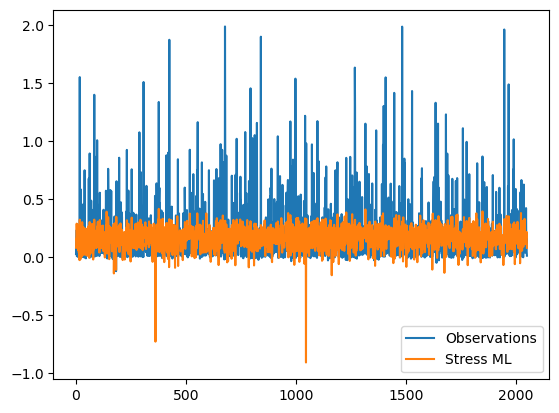

In [39]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.49560965],
       [0.49560965, 1.        ]])

In [41]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [42]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.261056091048369

## Correlation

In [43]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.49560965],
       [0.49560965, 1.        ]])

In [44]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

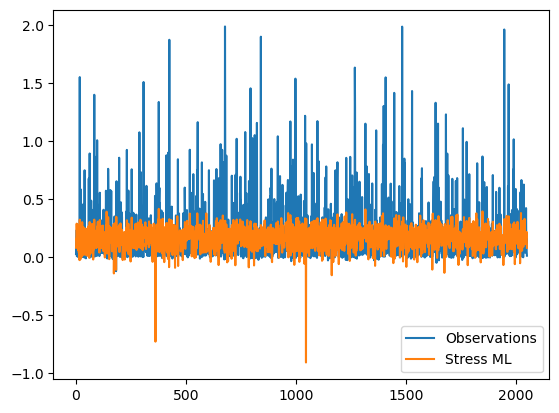

In [45]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [46]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.49560965],
       [0.49560965, 1.        ]])

In [47]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [48]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.261056091048369

# Other experiments

In [49]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [50]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [51]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 0s 1ms/step - loss: 2.7934 - mean_absolute_error: 1.2689 - val_loss: 1.1595 - val_mean_absolute_error: 0.7619
Epoch 2/500
180/180 [==============================] - 0s 724us/step - loss: 1.1776 - mean_absolute_error: 0.7609 - val_loss: 0.8641 - val_mean_absolute_error: 0.6336
Epoch 3/500
180/180 [==============================] - 0s 709us/step - loss: 0.9071 - mean_absolute_error: 0.6327 - val_loss: 0.7684 - val_mean_absolute_error: 0.5824
Epoch 4/500
180/180 [==============================] - 0s 702us/step - loss: 0.7347 - mean_absolute_error: 0.5808 - val_loss: 0.7269 - val_mean_absolute_error: 0.5575
Epoch 5/500
180/180 [==============================] - 0s 727us/step - loss: 0.7200 - mean_absolute_error: 0.5655 - val_loss: 0.7025 - val_mean_absolute_error: 0.5403
Epoch 6/500
180/180 [==============================] - 0s 762us/step - loss: 0.7221 - mean_absolute_error: 0.5534 - val_loss: 0.6808 - val_mean_absolute_error: 0.5192


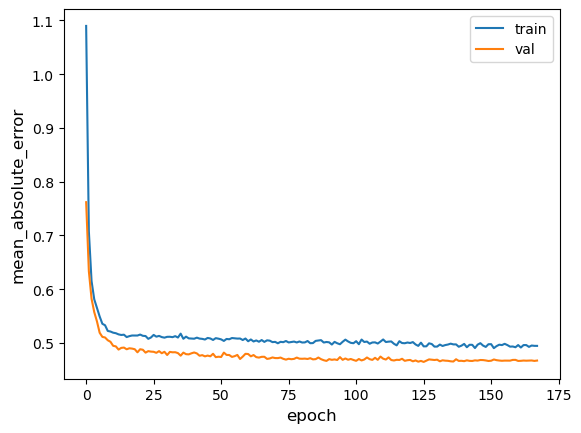

65/65 [==============================] - 0s 368us/step - loss: 0.6400 - mean_absolute_error: 0.4859
Test accuracy 0.4858693778514862
Test loss 0.640008807182312


In [52]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [53]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

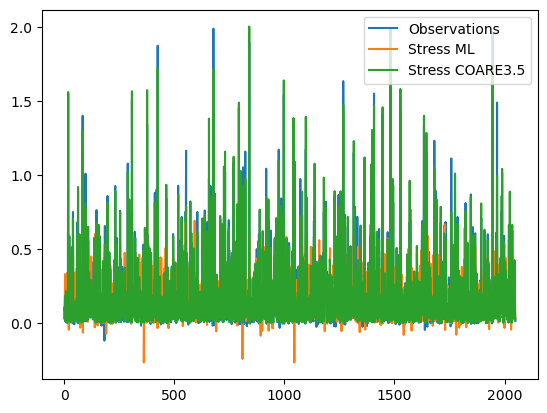

In [54]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

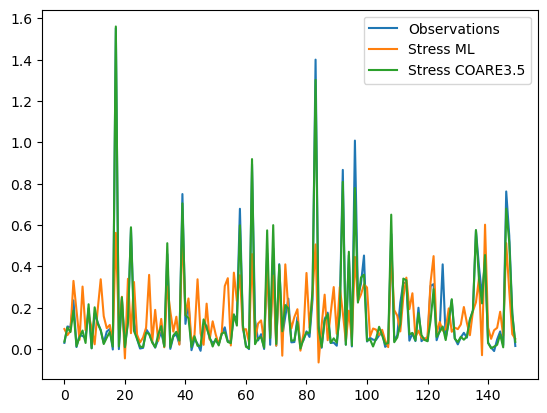

In [55]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [56]:
rmse(y_test.values, y_test_pred)

0.2832616869768948

## Correlation

In [57]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63764088],
       [0.63764088, 1.        ]])

In [58]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [59]:
y_test.values.shape

(2050,)

In [60]:
y_test_pred[:, 0].shape

(2050,)

In [61]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [62]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.03049151, 0.10961366, 0.1056779 , ..., 0.1810988 , 0.04592175,
       0.01454697])

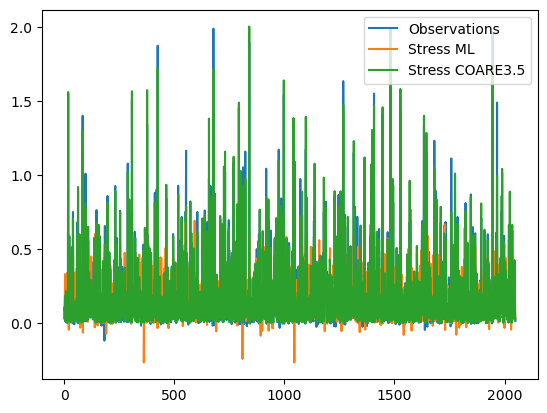

In [63]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

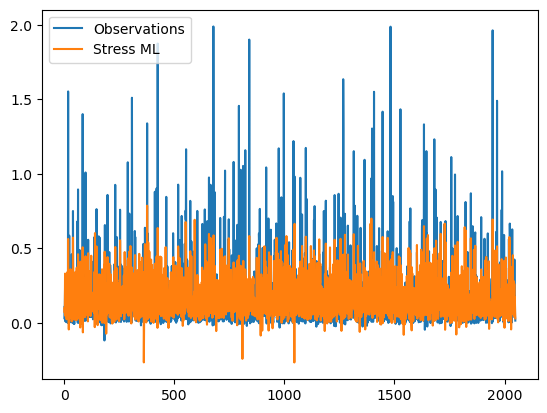

In [64]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [65]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [66]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2832616869768948

Text(0, 0.5, 'Stress ML [N/m²]')

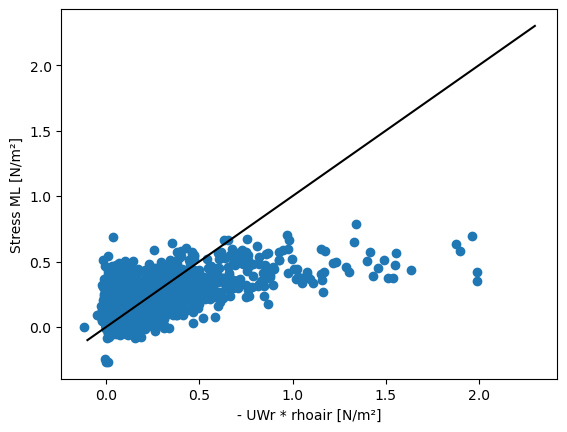

In [67]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [68]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [69]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [70]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 0s 2ms/step - loss: 1.2801 - mean_absolute_error: 0.8066 - val_loss: 1.0626 - val_mean_absolute_error: 0.6278
Epoch 2/500
90/90 [==============================] - 0s 970us/step - loss: 1.1499 - mean_absolute_error: 0.7171 - val_loss: 0.9501 - val_mean_absolute_error: 0.6064
Epoch 3/500
90/90 [==============================] - 0s 895us/step - loss: 1.0496 - mean_absolute_error: 0.6751 - val_loss: 0.8868 - val_mean_absolute_error: 0.5893
Epoch 4/500
90/90 [==============================] - 0s 874us/step - loss: 0.9581 - mean_absolute_error: 0.6391 - val_loss: 0.8511 - val_mean_absolute_error: 0.5760
Epoch 5/500
90/90 [==============================] - 0s 903us/step - loss: 0.8584 - mean_absolute_error: 0.6119 - val_loss: 0.8183 - val_mean_absolute_error: 0.5646
Epoch 6/500
90/90 [==============================] - 0s 893us/step - loss: 0.8944 - mean_absolute_error: 0.6059 - val_loss: 0.7851 - val_mean_absolute_error: 0.5498
Epoch 7/500


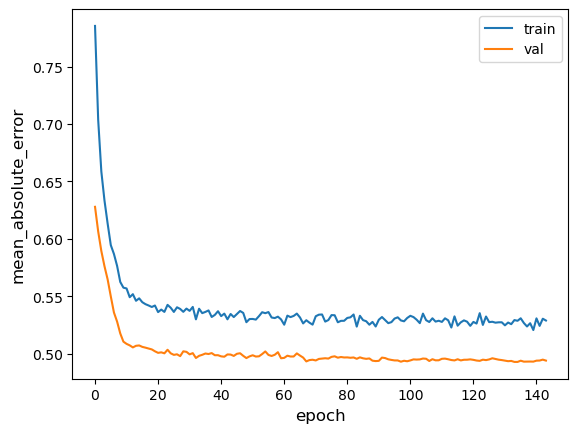

65/65 [==============================] - 0s 393us/step - loss: 0.7024 - mean_absolute_error: 0.5149
Test accuracy 0.5148851275444031
Test loss 0.702380895614624


In [71]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [72]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [73]:
rmse(y_test.values, y_test_pred)

0.2688234719074618

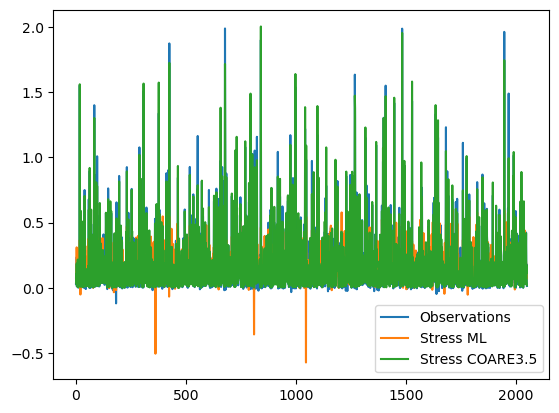

In [74]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

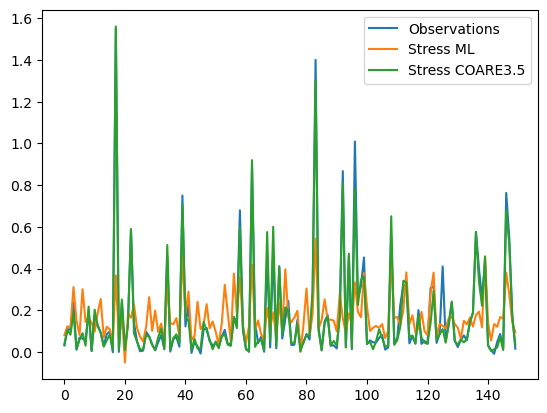

In [75]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

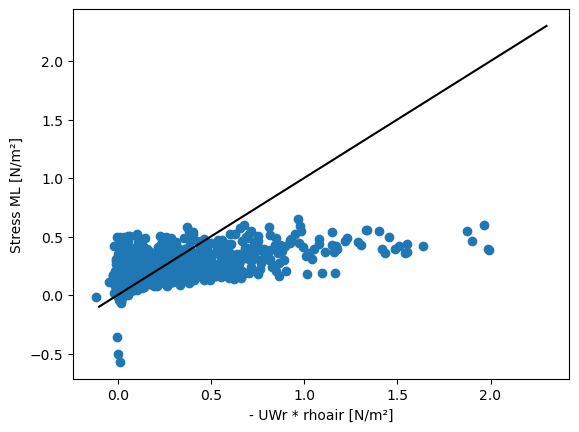

In [76]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [77]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.60731498],
       [0.60731498, 1.        ]])

In [78]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

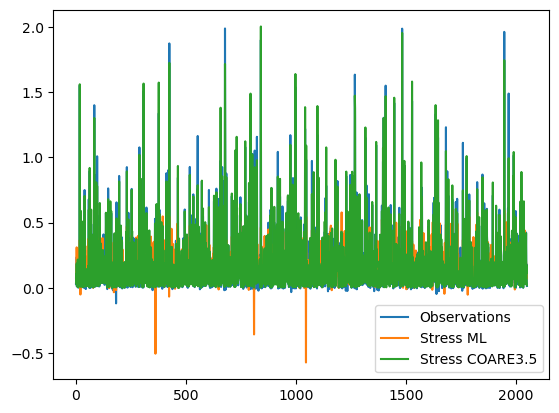

In [79]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

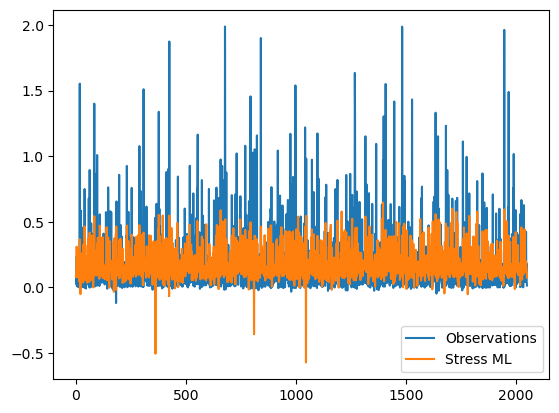

In [80]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [81]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [82]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2688234719074618

Text(0, 0.5, 'Stress ML [N/m²]')

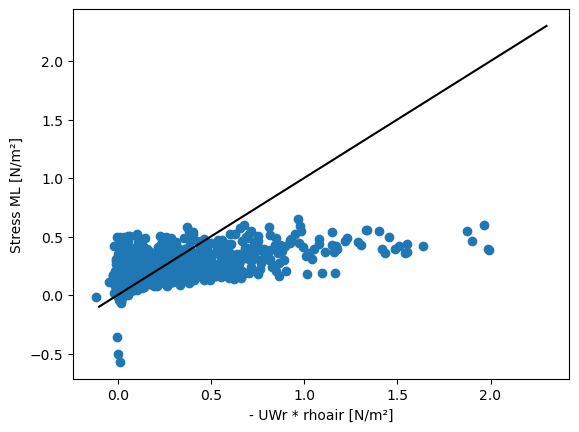

In [83]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [84]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [85]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [86]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 1ms/step - loss: 2.3187 - mean_absolute_error: 1.1271 - val_loss: 1.0047 - val_mean_absolute_error: 0.6123
Epoch 2/500
180/180 [==============================] - 0s 773us/step - loss: 1.3935 - mean_absolute_error: 0.8554 - val_loss: 0.8220 - val_mean_absolute_error: 0.5627
Epoch 3/500
180/180 [==============================] - 0s 833us/step - loss: 1.1941 - mean_absolute_error: 0.7467 - val_loss: 0.7568 - val_mean_absolute_error: 0.5318
Epoch 4/500
180/180 [==============================] - 0s 841us/step - loss: 1.0221 - mean_absolute_error: 0.6867 - val_loss: 0.7171 - val_mean_absolute_error: 0.5095
Epoch 5/500
180/180 [==============================] - 0s 821us/step - loss: 0.9189 - mean_absolute_error: 0.6432 - val_loss: 0.6848 - val_mean_absolute_error: 0.5004
Epoch 6/500
180/180 [==============================] - 0s 831us/step - loss: 0.8240 - mean_absolute_error: 0.5894 - val_loss: 0.6656 - val_mean_absolute_error: 0.4899


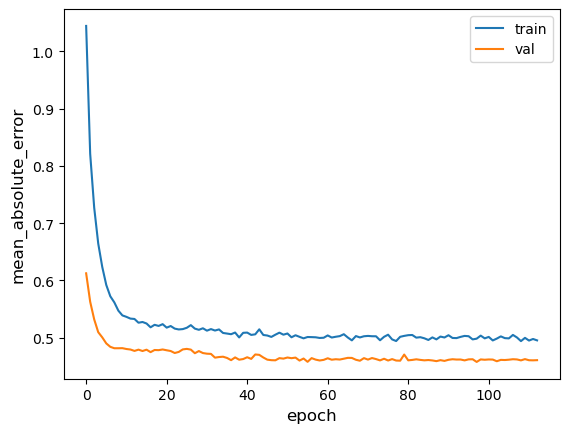

65/65 [==============================] - 0s 358us/step - loss: 0.6466 - mean_absolute_error: 0.4842
Test accuracy 0.48418083786964417
Test loss 0.6465681791305542


In [87]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [88]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [89]:
rmse(y_test.values, y_test_pred)

0.28167301870101613

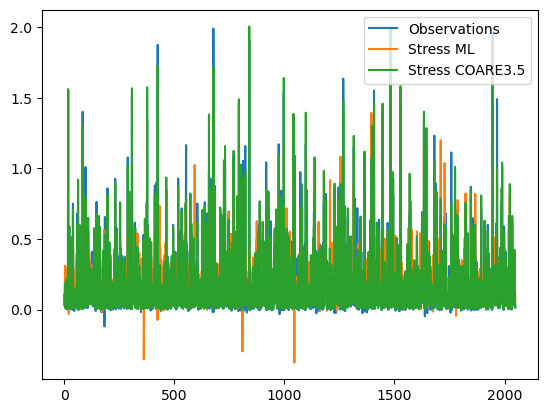

In [90]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

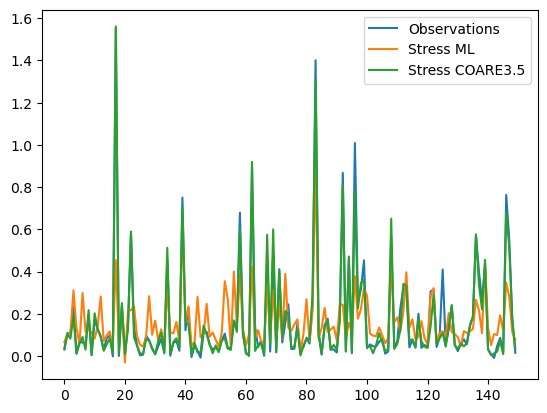

In [91]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

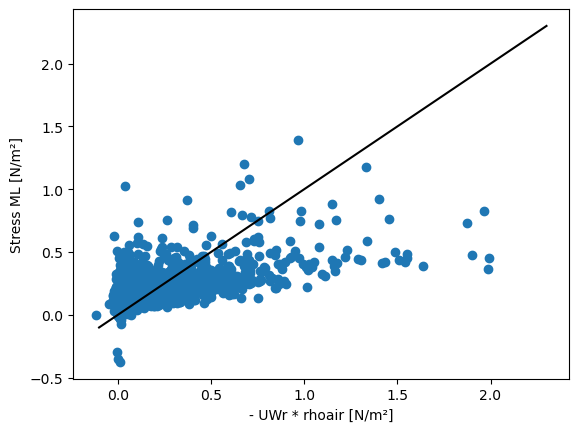

In [92]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [93]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63349868],
       [0.63349868, 1.        ]])

In [94]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

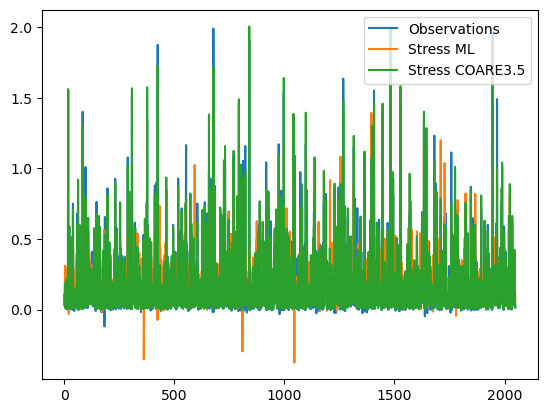

In [95]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

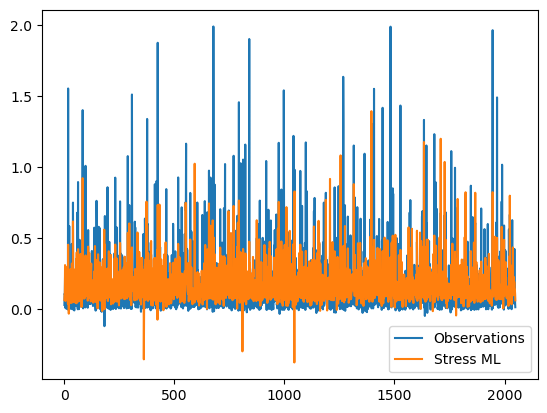

In [96]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [97]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [98]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.28167301870101613

Text(0, 0.5, 'Stress ML [N/m²]')

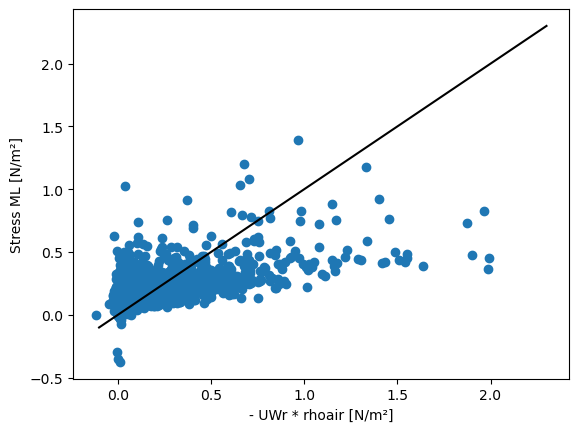

In [99]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [100]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [101]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [102]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 2ms/step - loss: 1.4529 - mean_absolute_error: 0.8745 - val_loss: 0.7942 - val_mean_absolute_error: 0.5936
Epoch 2/500
180/180 [==============================] - 0s 1ms/step - loss: 0.9820 - mean_absolute_error: 0.7014 - val_loss: 0.6279 - val_mean_absolute_error: 0.4718
Epoch 3/500
180/180 [==============================] - 0s 1ms/step - loss: 0.8403 - mean_absolute_error: 0.6402 - val_loss: 0.6008 - val_mean_absolute_error: 0.4585
Epoch 4/500
180/180 [==============================] - 0s 1ms/step - loss: 0.7632 - mean_absolute_error: 0.5871 - val_loss: 0.5705 - val_mean_absolute_error: 0.4543
Epoch 5/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6591 - mean_absolute_error: 0.5410 - val_loss: 0.5600 - val_mean_absolute_error: 0.4611
Epoch 6/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6957 - mean_absolute_error: 0.5481 - val_loss: 0.5616 - val_mean_absolute_error: 0.4505
Epoch 7/50

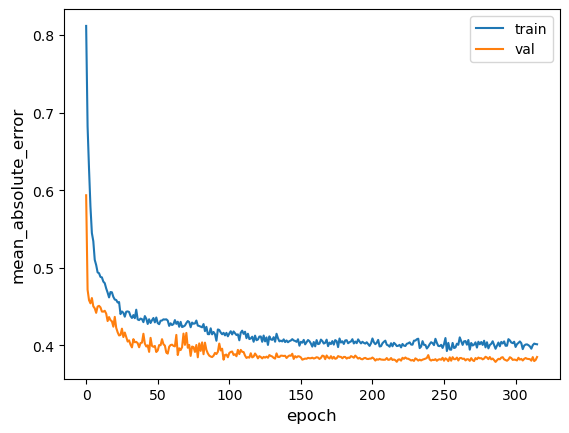

65/65 [==============================] - 0s 380us/step - loss: 0.4478 - mean_absolute_error: 0.4016
Test accuracy 0.4015609920024872
Test loss 0.4477648437023163


In [103]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [104]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [105]:
rmse(y_test.values, y_test_pred)

0.3053724329493233

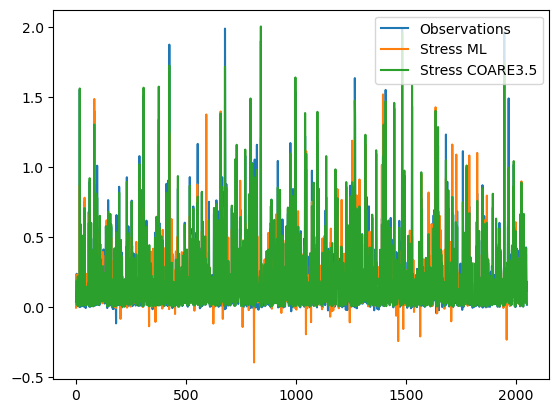

In [106]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

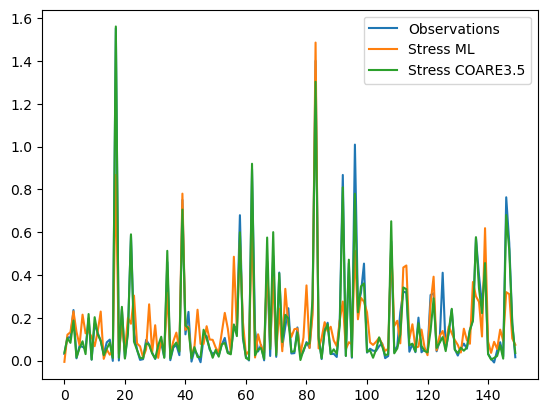

In [107]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

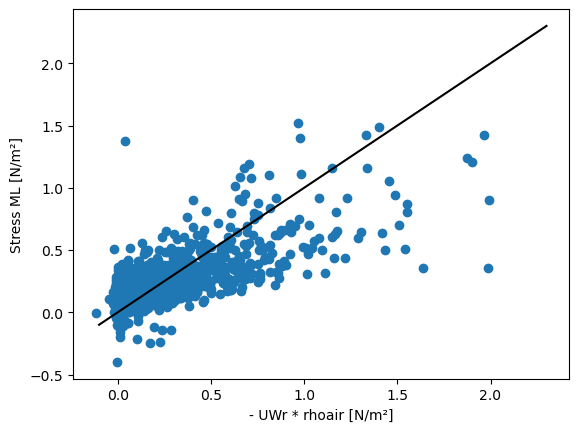

In [108]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [109]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.76374651],
       [0.76374651, 1.        ]])

In [110]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

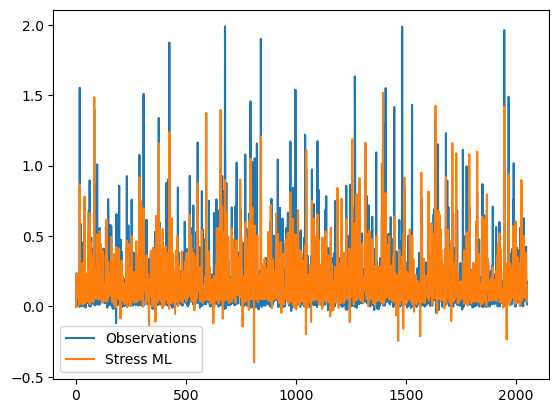

In [111]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [112]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [113]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.3053724329493233

Text(0, 0.5, 'Stress ML [N/m²]')

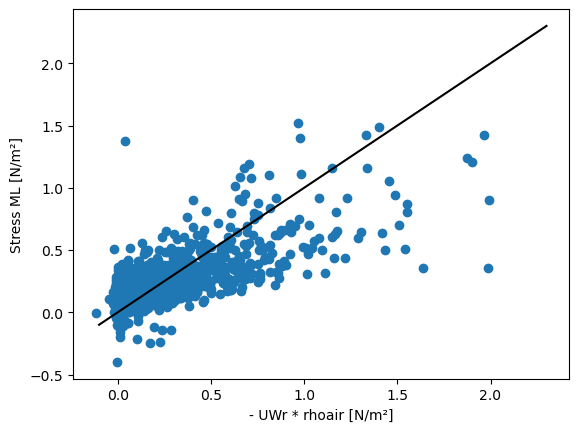

In [114]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [115]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.76374651],
       [0.76374651, 1.        ]])

In [116]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [117]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [118]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [119]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 5ms/step - loss: 2.7322 - mean_absolute_error: 1.1924 - val_loss: 0.8663 - val_mean_absolute_error: 0.6283
Epoch 2/500
180/180 [==============================] - 1s 4ms/step - loss: 1.0976 - mean_absolute_error: 0.7560 - val_loss: 0.7444 - val_mean_absolute_error: 0.5787
Epoch 3/500
180/180 [==============================] - 1s 4ms/step - loss: 0.8768 - mean_absolute_error: 0.6534 - val_loss: 0.5354 - val_mean_absolute_error: 0.4387
Epoch 4/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6705 - mean_absolute_error: 0.5626 - val_loss: 0.5015 - val_mean_absolute_error: 0.4424
Epoch 5/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6184 - mean_absolute_error: 0.5240 - val_loss: 0.4986 - val_mean_absolute_error: 0.4389
Epoch 6/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6295 - mean_absolute_error: 0.5340 - val_loss: 0.5123 - val_mean_absolute_error: 0.4448
Epoch 7/50

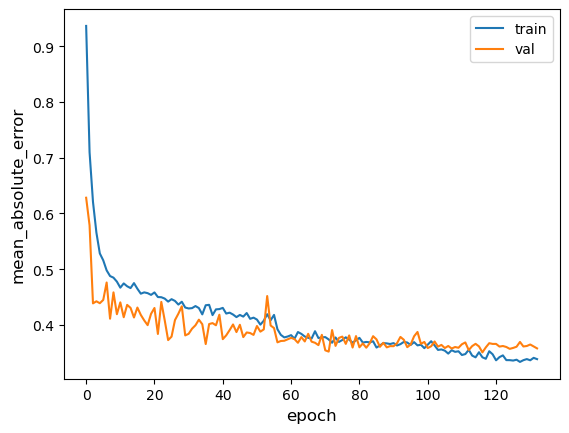

65/65 [==============================] - 0s 713us/step - loss: 0.4396 - mean_absolute_error: 0.3599
Test accuracy 0.35990405082702637
Test loss 0.43957656621932983


In [120]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [121]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [122]:
rmse(y_test.values, y_test_pred)

0.3295583161737394

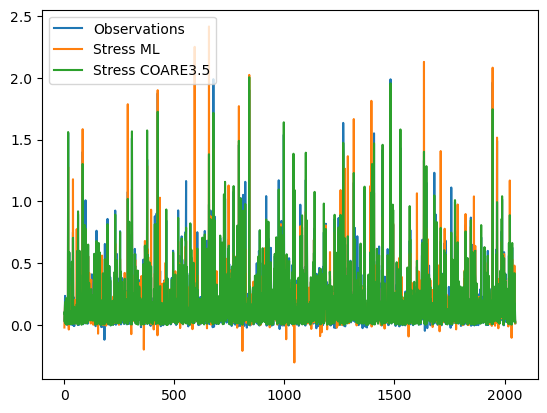

In [123]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

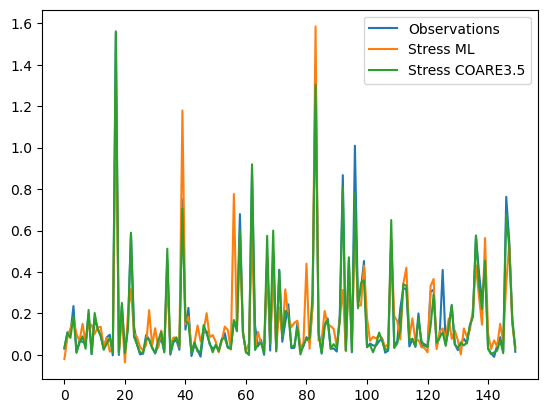

In [124]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [125]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.77798053],
       [0.77798053, 1.        ]])

In [126]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

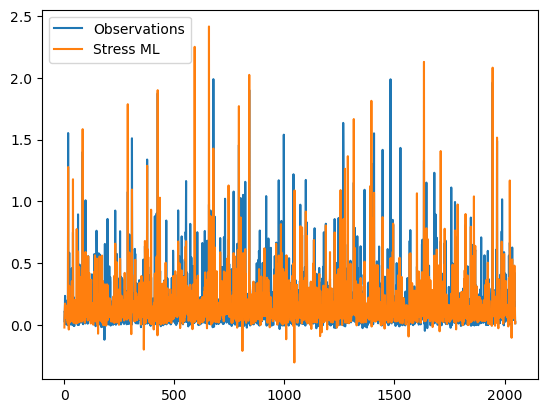

In [127]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [128]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [129]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.3295583161737394

Text(0, 0.5, 'Stress ML [N/m²]')

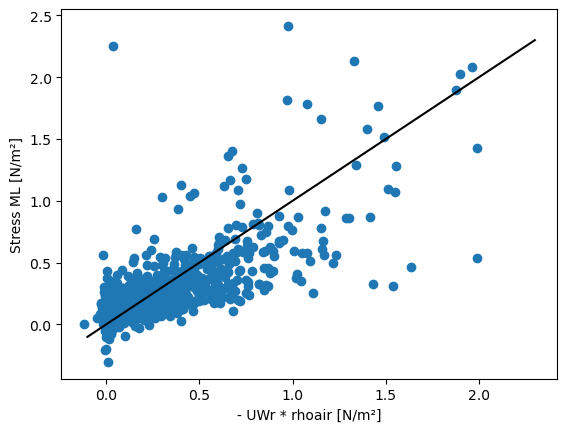

In [130]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [131]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [132]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [133]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 3s 13ms/step - loss: 2.7315 - mean_absolute_error: 1.1831 - val_loss: 1.0488 - val_mean_absolute_error: 0.7798
Epoch 2/500
180/180 [==============================] - 2s 12ms/step - loss: 1.1301 - mean_absolute_error: 0.7404 - val_loss: 0.7493 - val_mean_absolute_error: 0.5872
Epoch 3/500
180/180 [==============================] - 2s 12ms/step - loss: 0.7481 - mean_absolute_error: 0.6028 - val_loss: 0.5834 - val_mean_absolute_error: 0.4886
Epoch 4/500
180/180 [==============================] - 2s 12ms/step - loss: 0.6408 - mean_absolute_error: 0.5530 - val_loss: 0.5409 - val_mean_absolute_error: 0.4858
Epoch 5/500
180/180 [==============================] - 2s 12ms/step - loss: 0.6679 - mean_absolute_error: 0.5441 - val_loss: 0.4916 - val_mean_absolute_error: 0.4415
Epoch 6/500
180/180 [==============================] - 2s 13ms/step - loss: 0.5861 - mean_absolute_error: 0.5022 - val_loss: 0.4890 - val_mean_absolute_error: 0.4452
Epoc

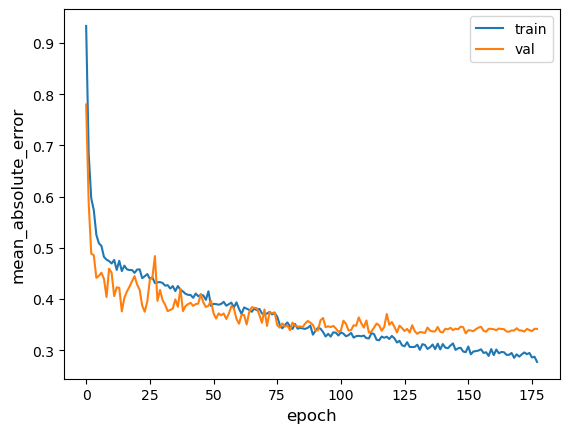

65/65 [==============================] - 0s 2ms/step - loss: 0.3898 - mean_absolute_error: 0.3482
Test accuracy 0.34816402196884155
Test loss 0.38978880643844604


In [134]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [135]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [136]:
rmse(y_test.values, y_test_pred)

0.31435227727879167

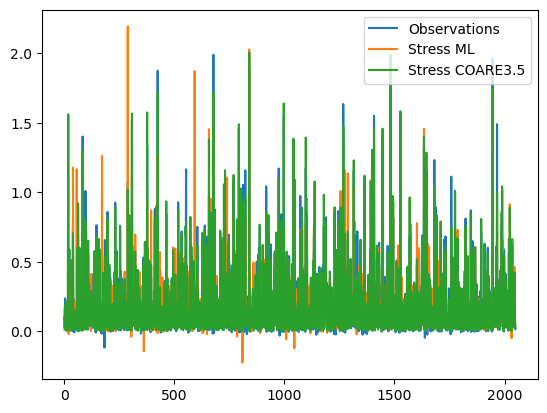

In [137]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

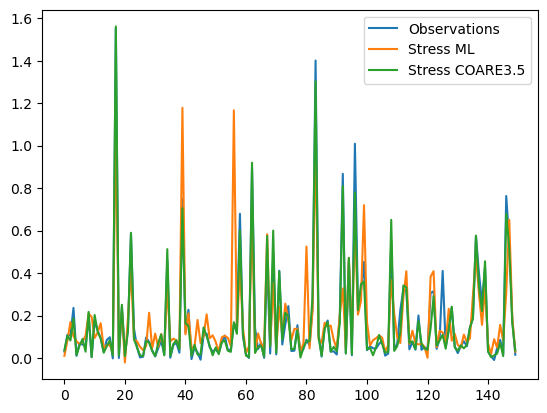

In [138]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [139]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.79831309],
       [0.79831309, 1.        ]])

In [140]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

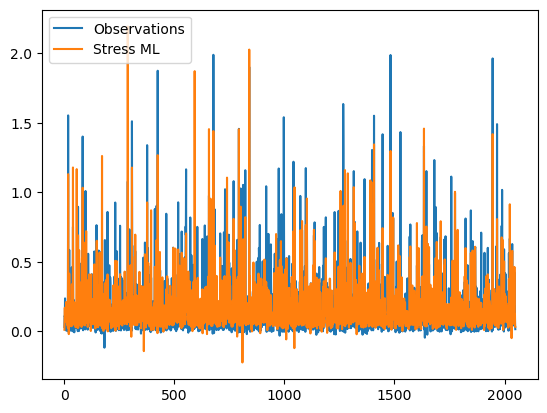

In [141]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [142]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [143]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.31435227727879167

Text(0, 0.5, 'Stress ML [N/m²]')

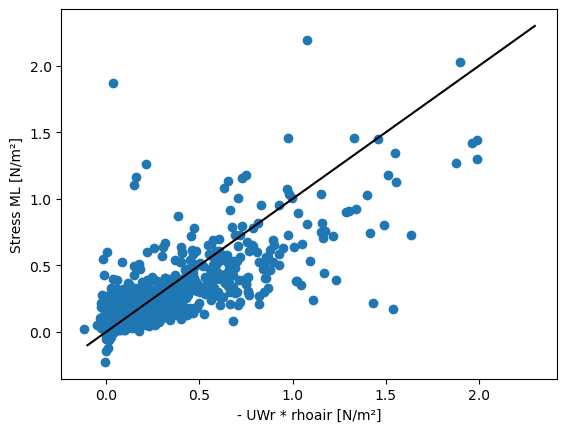

In [144]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

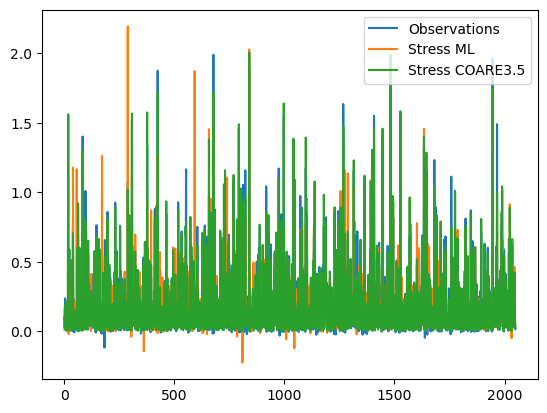

In [145]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

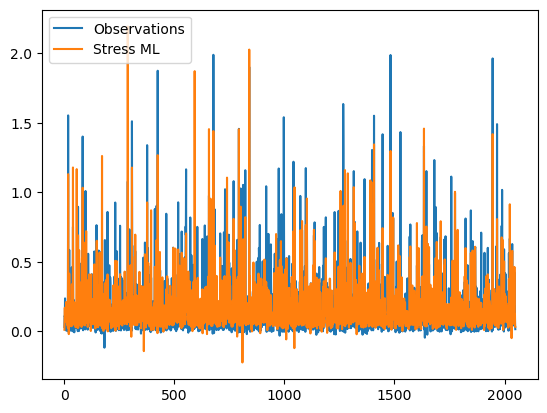

In [146]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [147]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.79831309],
       [0.79831309, 1.        ]])

In [148]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [149]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.31435227727879167

Text(0, 0.5, 'Stress ML [N/m²]')

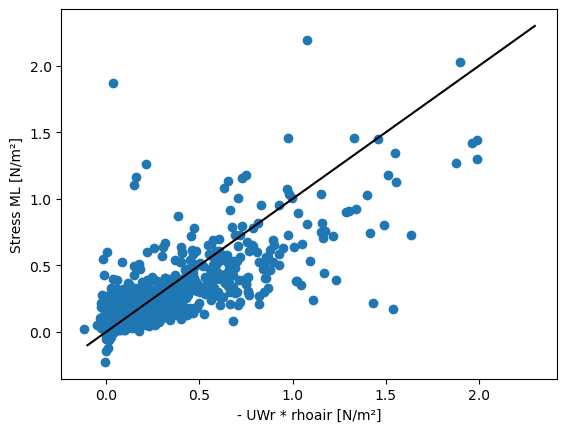

In [150]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [151]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [152]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [153]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 42ms/step - loss: 15.0702 - mean_absolute_error: 2.4119 - val_loss: 0.9346 - val_mean_absolute_error: 0.6314
Epoch 2/500
12/12 [==============================] - 0s 32ms/step - loss: 1.9731 - mean_absolute_error: 0.9991 - val_loss: 0.8980 - val_mean_absolute_error: 0.6412
Epoch 3/500
12/12 [==============================] - 0s 30ms/step - loss: 1.2063 - mean_absolute_error: 0.8018 - val_loss: 0.9189 - val_mean_absolute_error: 0.6528
Epoch 4/500
12/12 [==============================] - 0s 28ms/step - loss: 1.0445 - mean_absolute_error: 0.7222 - val_loss: 0.9026 - val_mean_absolute_error: 0.6685
Epoch 5/500
12/12 [==============================] - 0s 29ms/step - loss: 0.9471 - mean_absolute_error: 0.6846 - val_loss: 0.8937 - val_mean_absolute_error: 0.6316
Epoch 6/500
12/12 [==============================] - 0s 30ms/step - loss: 1.0140 - mean_absolute_error: 0.7038 - val_loss: 0.9214 - val_mean_absolute_error: 0.6974
Epoch 7/500
12/

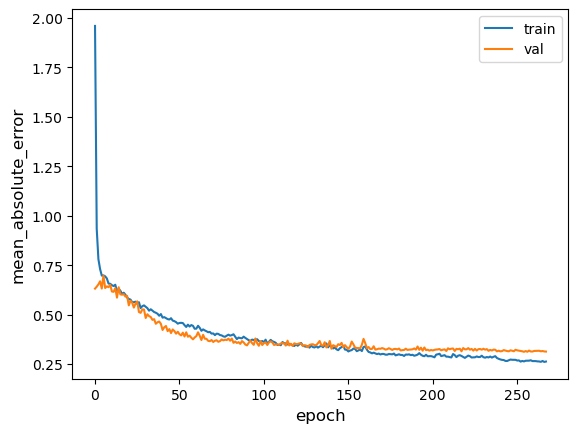

65/65 [==============================] - 0s 2ms/step - loss: 0.3714 - mean_absolute_error: 0.3299
Test accuracy 0.3299184739589691
Test loss 0.3713836967945099


In [154]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [155]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [156]:
rmse(y_test.values, y_test_pred)

0.3347464917450318

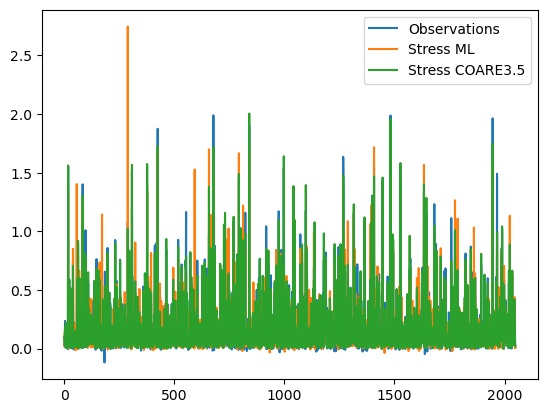

In [157]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

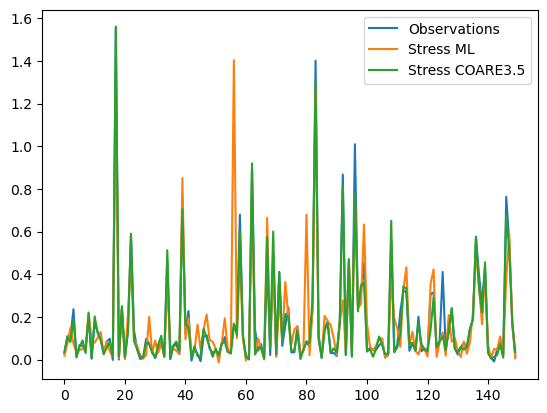

In [158]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [159]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81728644],
       [0.81728644, 1.        ]])

In [160]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

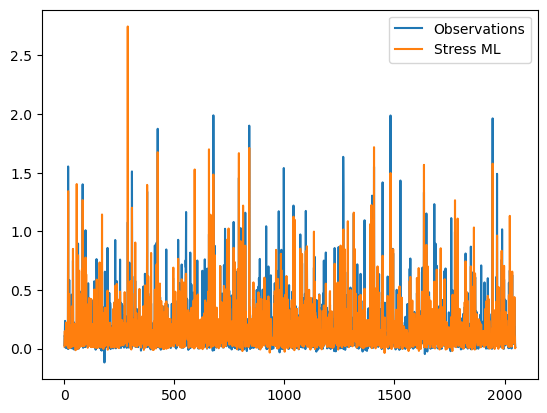

In [161]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [162]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [163]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3347464917450318

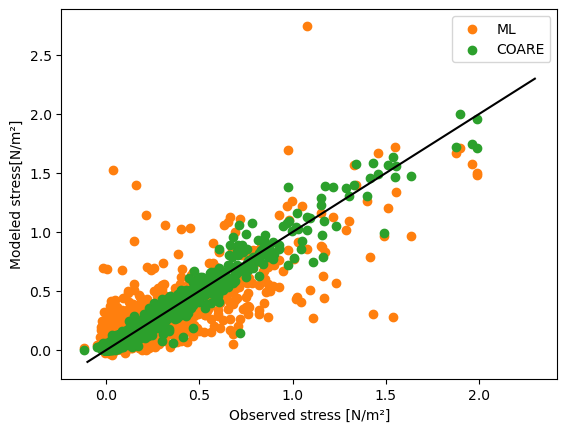

In [164]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

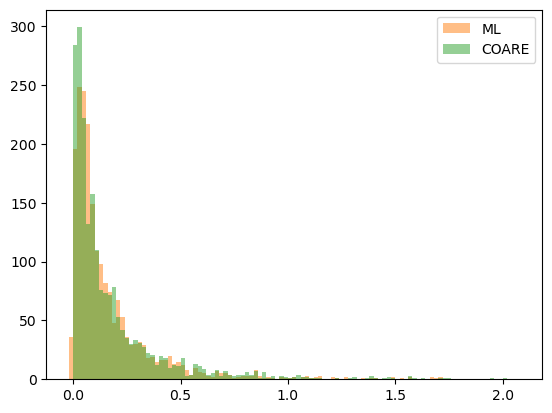

In [165]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [166]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [167]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [168]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 42ms/step - loss: 15.4881 - mean_absolute_error: 2.5673 - val_loss: 0.9781 - val_mean_absolute_error: 0.6542
Epoch 2/500
12/12 [==============================] - 0s 31ms/step - loss: 2.0646 - mean_absolute_error: 1.0266 - val_loss: 0.9226 - val_mean_absolute_error: 0.6067
Epoch 3/500
12/12 [==============================] - 0s 32ms/step - loss: 1.2443 - mean_absolute_error: 0.7771 - val_loss: 0.9105 - val_mean_absolute_error: 0.5912
Epoch 4/500
12/12 [==============================] - 0s 30ms/step - loss: 1.1129 - mean_absolute_error: 0.7317 - val_loss: 0.9068 - val_mean_absolute_error: 0.5770
Epoch 5/500
12/12 [==============================] - 0s 30ms/step - loss: 1.1244 - mean_absolute_error: 0.7214 - val_loss: 0.8886 - val_mean_absolute_error: 0.6023
Epoch 6/500
12/12 [==============================] - 0s 33ms/step - loss: 1.1422 - mean_absolute_error: 0.7076 - val_loss: 0.8978 - val_mean_absolute_error: 0.5820
Epoch 7/500
12/

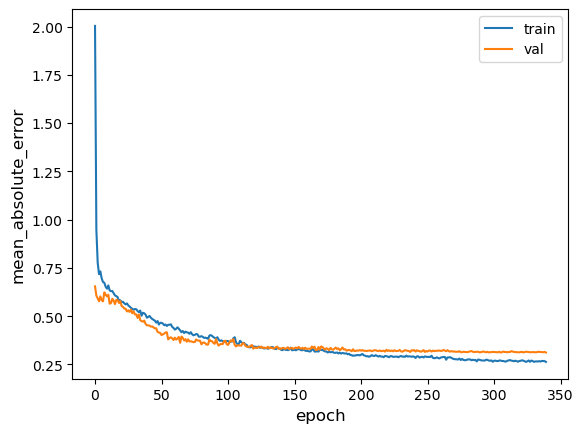

65/65 [==============================] - 0s 2ms/step - loss: 0.3804 - mean_absolute_error: 0.3290
Test accuracy 0.3290298283100128
Test loss 0.3803957998752594


In [169]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [170]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [171]:
rmse(y_test.values, y_test_pred)

0.33330347727830056

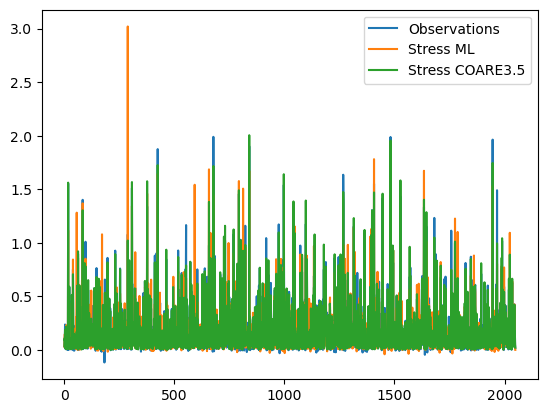

In [172]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

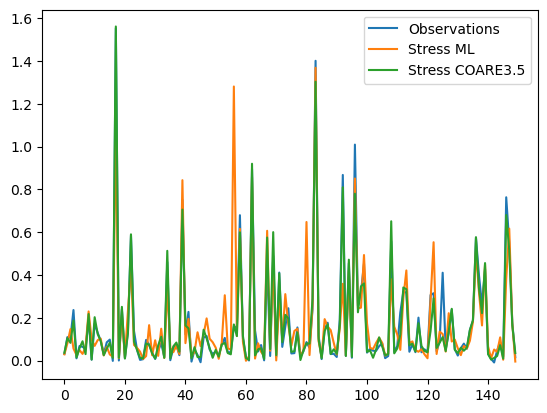

In [173]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [174]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81202091],
       [0.81202091, 1.        ]])

In [175]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

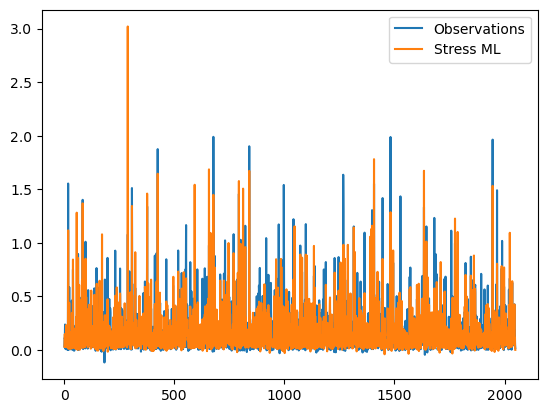

In [176]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [177]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [178]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.33330347727830056

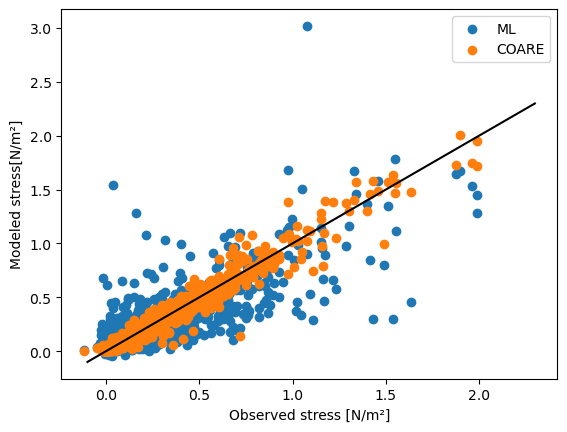

In [179]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

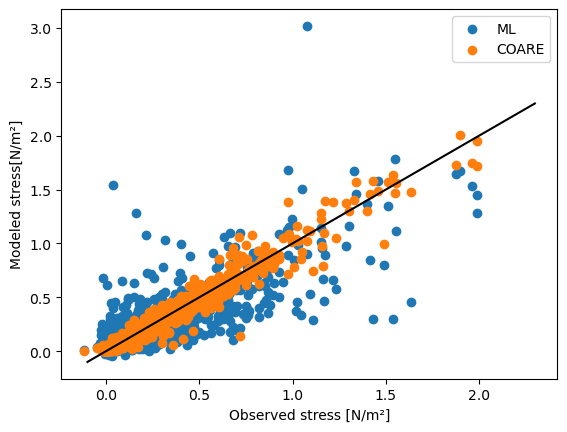

In [180]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [181]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [182]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [183]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 136ms/step - loss: 16.9930 - mean_absolute_error: 2.7756 - val_loss: 0.9943 - val_mean_absolute_error: 0.6269
Epoch 2/500
6/6 [==============================] - 1s 114ms/step - loss: 2.1103 - mean_absolute_error: 1.0664 - val_loss: 0.9539 - val_mean_absolute_error: 0.6054
Epoch 3/500
6/6 [==============================] - 1s 116ms/step - loss: 1.7349 - mean_absolute_error: 0.9679 - val_loss: 0.9497 - val_mean_absolute_error: 0.5659
Epoch 4/500
6/6 [==============================] - 1s 111ms/step - loss: 1.4332 - mean_absolute_error: 0.8229 - val_loss: 0.9465 - val_mean_absolute_error: 0.5522
Epoch 5/500
6/6 [==============================] - 1s 118ms/step - loss: 1.2297 - mean_absolute_error: 0.7722 - val_loss: 0.9674 - val_mean_absolute_error: 0.5585
Epoch 6/500
6/6 [==============================] - 1s 117ms/step - loss: 1.2077 - mean_absolute_error: 0.7489 - val_loss: 0.9605 - val_mean_absolute_error: 0.5516
Epoch 7/500
6/6 [====

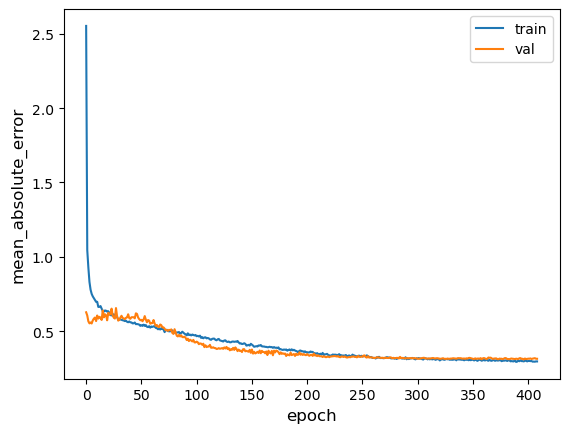

65/65 [==============================] - 0s 7ms/step - loss: 0.3684 - mean_absolute_error: 0.3380
Test accuracy 0.3379996716976166
Test loss 0.36841243505477905


In [184]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [185]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [186]:
rmse(y_test.values, y_test_pred)

0.3325408606753875

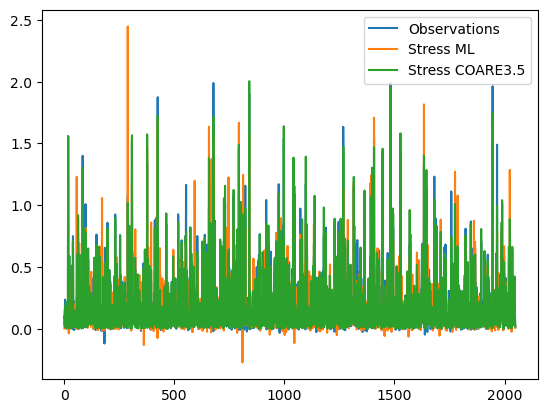

In [187]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

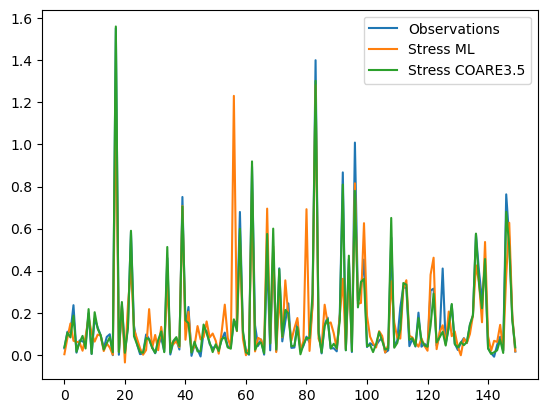

In [188]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [189]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81748921],
       [0.81748921, 1.        ]])

In [190]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

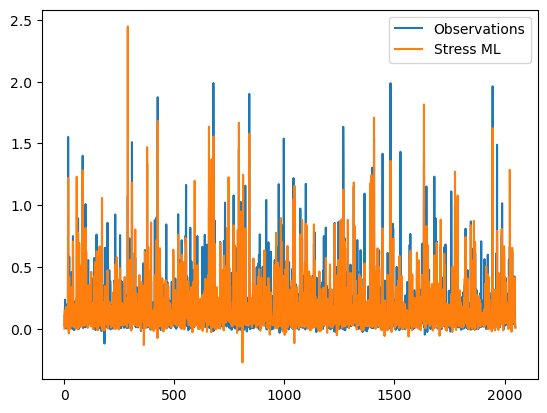

In [191]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [192]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [193]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3325408606753875

Text(0, 0.5, 'Stress ML [N/m²]')

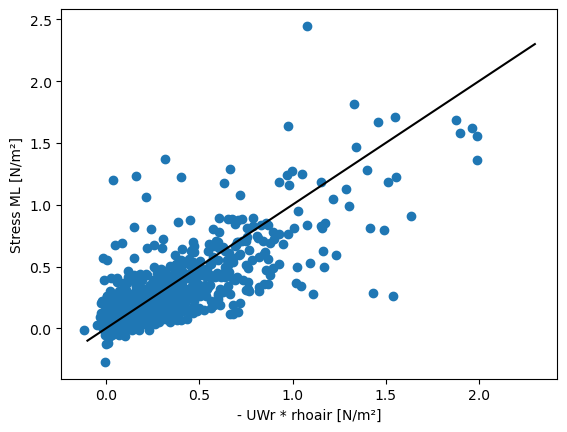

In [194]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

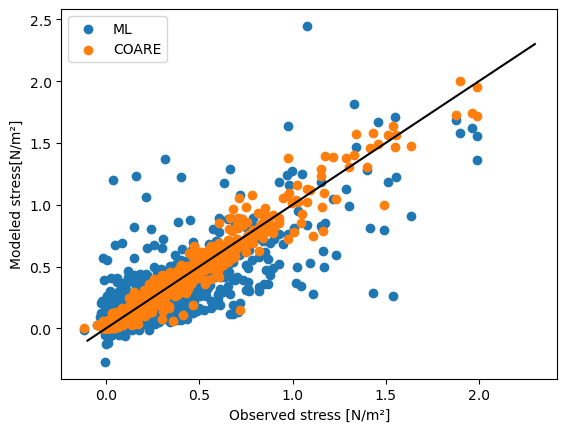

In [195]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [196]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [197]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [198]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 594ms/step - loss: 15.8847 - mean_absolute_error: 2.7004 - val_loss: 1.2968 - val_mean_absolute_error: 0.6443
Epoch 2/1000
3/3 [==============================] - 2s 532ms/step - loss: 3.6041 - mean_absolute_error: 1.4285 - val_loss: 1.5011 - val_mean_absolute_error: 0.6915
Epoch 3/1000
3/3 [==============================] - 2s 556ms/step - loss: 2.0292 - mean_absolute_error: 1.0355 - val_loss: 2.0871 - val_mean_absolute_error: 0.8117
Epoch 4/1000
3/3 [==============================] - 2s 543ms/step - loss: 1.8395 - mean_absolute_error: 0.9924 - val_loss: 2.2230 - val_mean_absolute_error: 0.9463
Epoch 5/1000
3/3 [==============================] - 2s 538ms/step - loss: 1.6107 - mean_absolute_error: 0.9011 - val_loss: 1.7567 - val_mean_absolute_error: 0.9191
Epoch 6/1000
3/3 [==============================] - 2s 544ms/step - loss: 1.7395 - mean_absolute_error: 0.8419 - val_loss: 2.0507 - val_mean_absolute_error: 0.9679
Epoch 7/1000
3/

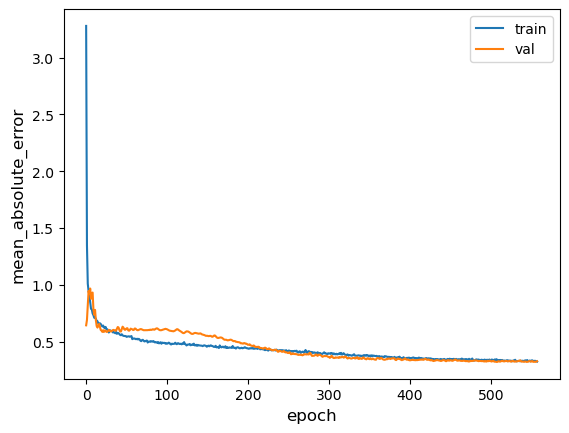

65/65 [==============================] - 2s 23ms/step - loss: 0.3589 - mean_absolute_error: 0.3360
Test accuracy 0.33595994114875793
Test loss 0.3589399755001068


In [199]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [200]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [201]:
rmse(y_test.values, y_test_pred)

0.3174989523510023

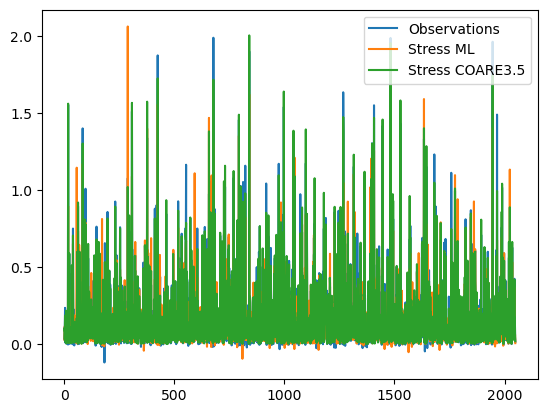

In [202]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

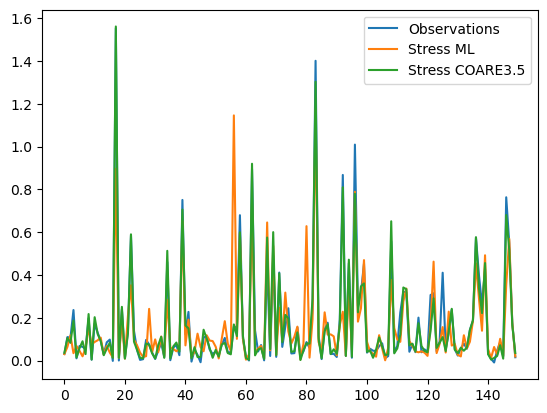

In [203]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [204]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.82268055],
       [0.82268055, 1.        ]])

In [205]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

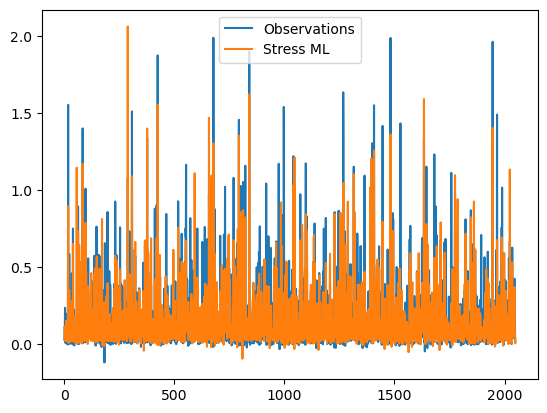

In [206]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [207]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [208]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3174989523510023

Text(0, 0.5, 'Stress ML [N/m²]')

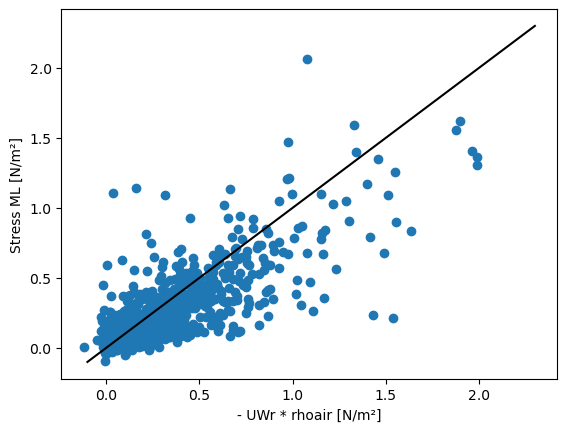

In [209]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [210]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [211]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [212]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 563ms/step - loss: 23.8533 - mean_absolute_error: 3.4425 - val_loss: 1.0126 - val_mean_absolute_error: 0.6790
Epoch 2/1000
3/3 [==============================] - 1s 506ms/step - loss: 2.6055 - mean_absolute_error: 1.2336 - val_loss: 1.2105 - val_mean_absolute_error: 0.8025
Epoch 3/1000
3/3 [==============================] - 1s 485ms/step - loss: 1.9918 - mean_absolute_error: 1.0582 - val_loss: 1.5684 - val_mean_absolute_error: 0.8394
Epoch 4/1000
3/3 [==============================] - 1s 492ms/step - loss: 1.8379 - mean_absolute_error: 0.9564 - val_loss: 1.2552 - val_mean_absolute_error: 0.7711
Epoch 5/1000
3/3 [==============================] - 1s 494ms/step - loss: 1.7345 - mean_absolute_error: 0.8988 - val_loss: 1.2645 - val_mean_absolute_error: 0.6568
Epoch 6/1000
3/3 [==============================] - 1s 495ms/step - loss: 1.4785 - mean_absolute_error: 0.8766 - val_loss: 0.8734 - val_mean_absolute_error: 0.5436
Epoch 7/1000
3/

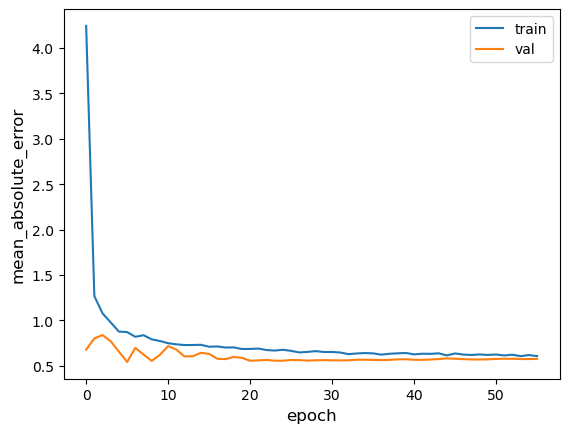

65/65 [==============================] - 1s 23ms/step - loss: 1.0237 - mean_absolute_error: 0.5831
Test accuracy 0.5830767750740051
Test loss 1.0237058401107788


In [213]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [214]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [215]:
rmse(y_test.values, y_test_pred)

0.25076061227494917

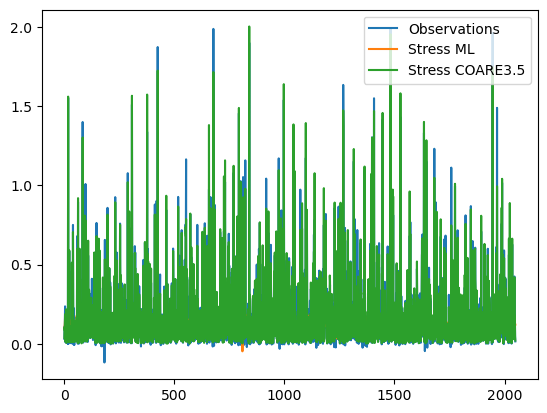

In [216]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

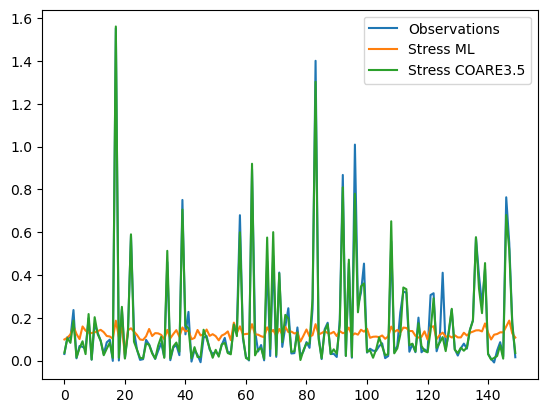

In [217]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [218]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.5181293],
       [0.5181293, 1.       ]])

In [219]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

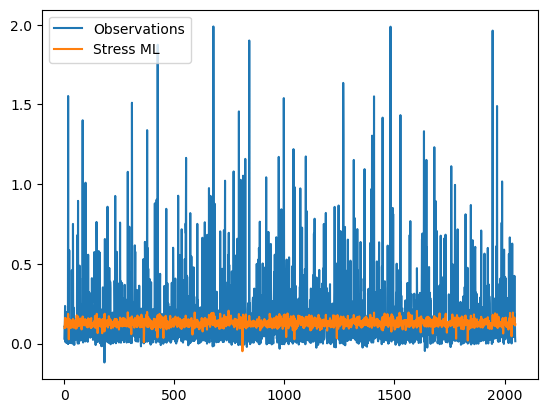

In [220]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [221]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [222]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.25076061227494917

Text(0, 0.5, 'Stress ML [N/m²]')

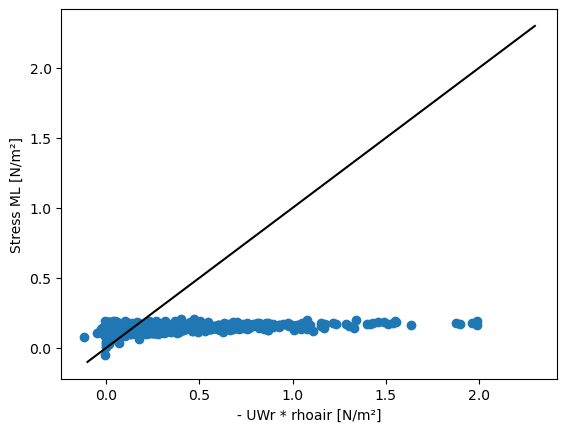

In [223]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [224]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [225]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [226]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 613ms/step - loss: 14.2410 - mean_absolute_error: 2.4925 - val_loss: 1.5781 - val_mean_absolute_error: 0.9029
Epoch 2/1000
3/3 [==============================] - 2s 546ms/step - loss: 3.6699 - mean_absolute_error: 1.4404 - val_loss: 0.9199 - val_mean_absolute_error: 0.6517
Epoch 3/1000
3/3 [==============================] - 2s 536ms/step - loss: 2.0734 - mean_absolute_error: 1.0139 - val_loss: 1.0255 - val_mean_absolute_error: 0.7395
Epoch 4/1000
3/3 [==============================] - 2s 550ms/step - loss: 1.7395 - mean_absolute_error: 0.9439 - val_loss: 1.9471 - val_mean_absolute_error: 0.9128
Epoch 5/1000
3/3 [==============================] - 2s 536ms/step - loss: 1.6949 - mean_absolute_error: 0.9431 - val_loss: 0.9589 - val_mean_absolute_error: 0.6643
Epoch 6/1000
3/3 [==============================] - 2s 538ms/step - loss: 1.5279 - mean_absolute_error: 0.8647 - val_loss: 0.9766 - val_mean_absolute_error: 0.6787
Epoch 7/1000
3/

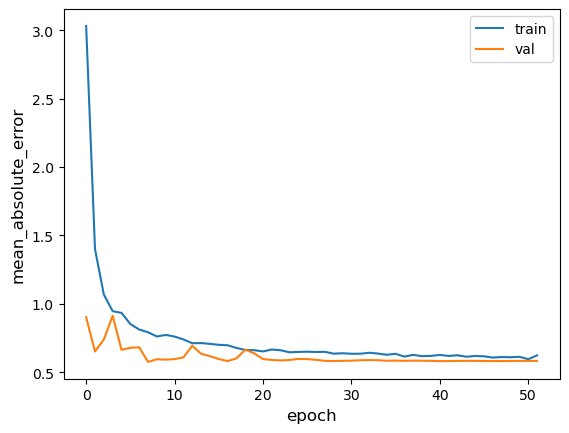

65/65 [==============================] - 2s 24ms/step - loss: 4.4627 - mean_absolute_error: 1.7063
Test accuracy 1.7063285112380981
Test loss 4.46268892288208


In [227]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [228]:
y_test_pred = multi_dense_model.predict(x_test)

In [229]:
rmse(y_test.values, y_test_pred)

2.11284479108812

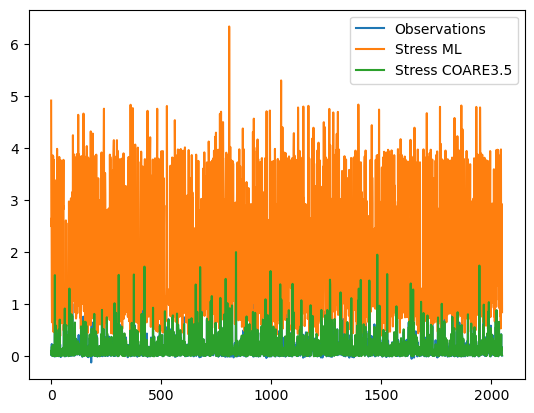

In [230]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

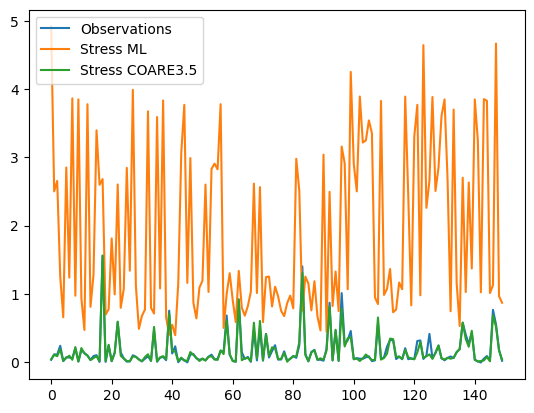

In [231]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [232]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.00234785],
       [0.00234785, 1.        ]])

In [233]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

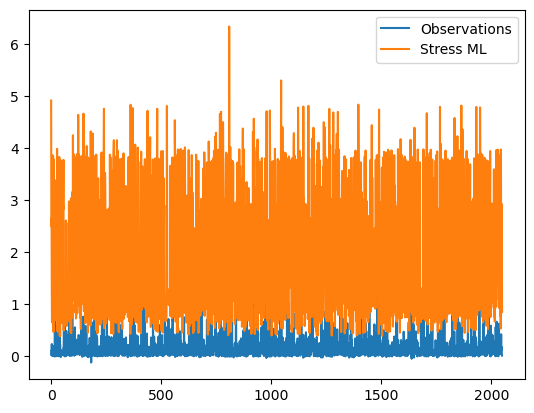

In [234]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [235]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97930876],
       [0.97930876, 1.        ]])

In [236]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

2.11284479108812

Text(0, 0.5, 'Stress ML [N/m²]')

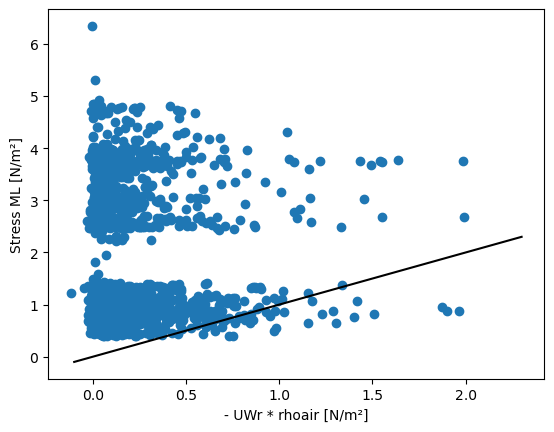

In [237]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 